### Neural Networks to fit $y = \sin(\theta)$ and $\theta = \arcsin(y)$

In [1]:
# Library imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Aliases
keras = tf.keras

In [16]:
# Local imports
from utils import gpu_grow_memory, TimeHistory, EpochLoss, plot_loss_hist
from utils import load_vartbl, save_vartbl, plot_style

from polar_coord import make_data_sin, make_dataset_sin
from polar_coord import make_model_sin_math, make_model_odd
from polar_coord import compile_and_fit

In [3]:
# Grow GPU memory (must be first operation in TF)
gpu_grow_memory()

In [4]:
# Plot style 
plot_style()

In [5]:
# Lightweight serialization
fname = '../pickle/polar_coord.pickle'
vartbl = load_vartbl(fname)

## Create datasets for $\theta \in [-\pi/2, \pi/2]$ and $y \in [-1, 1]$

In [6]:
# Make datasets for sin
n = 3600
data_sin = make_data_sin(n)
ds_p2c, ds_c2p, d2_p2p, ds_c2c = make_dataset_sin(n)

In [7]:
# Unpack one example batch
# theta, y = list(ds_p2c.take(1))[0]
# theta, y = theta.numpy(), y.numpy()

# Review data contents
# print(f'theta: min={np.min(theta):+8.5}, max={np.max(theta):+8.5}')
# print(f'    y: min={np.min(y):+8.5}, max={np.max(y):+8.5}')

In [8]:
theta = data_sin['theta']
y = data_sin['y']

## Deterministic Mathematical Models

In [9]:
# Mathematical models
math_p2c, math_c2p, math_p2p, math_c2c = make_model_sin_math()

In [10]:
# Set loss function and optimizer
loss = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam()
metrics = [keras.metrics.MeanAbsoluteError()]

# Set save_freq in terms of SAMPLES; this is every 500 epochs
epoch_size = n+1
save_freq = 500 * epoch_size

In [11]:
# Compile the math models
math_p2c.compile(loss=loss, optimizer=optimizer, metrics=metrics)
math_c2p.compile(loss=loss, optimizer=optimizer, metrics=metrics)
math_p2p.compile(loss=loss, optimizer=optimizer, metrics=metrics)
math_c2c.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [12]:
# Evaluate the p2c math model
math_p2c.evaluate(ds_p2c)

1/1 [==============================] - 0s 66ms/step - loss: 4.6015e-16 - mean_absolute_error: 8.6908e-09


[4.601469428267544e-16, 8.690771e-09]

In [13]:
# Evaluate the c2p math model
math_c2p.evaluate(ds_c2p)

1/1 [==============================] - 0s 59ms/step - loss: 6.4945e-13 - mean_absolute_error: 9.5310e-08


[6.494469675585868e-13, 9.5309716e-08]

In [14]:
# Evaluate the p2p math model
math_p2p.evaluate(theta, theta)

3601/3601 [==============================] - 0s 39us/sample - loss: 6.4904e-13 - mean_absolute_error: 9.3136e-08


[6.490446467481708e-13, 9.313639e-08]

In [15]:
# Evaluate the c2c math model
math_c2c.evaluate(y, y)

3601/3601 [==============================] - 0s 38us/sample - loss: 7.0153e-16 - mean_absolute_error: 1.2527e-08


[7.01525834862032e-16, 1.2526948e-08]

## Functions for visualizing neural network outputs $y = \sin(\theta)$

In [59]:
def plot_pred_sin(model, theta):
    # Predictions of the model
    y_pred = model.predict(theta)
    y_pred = y_pred.reshape((-1,))
    
    # Plot predictions
    fig, ax = plt.subplots(figsize=[16,9])
    ax.set_title(f'$y = sin(\\theta)$ in {model.name}')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-np.pi/2.0, np.pi/2.0)
    ax.set_xticks(np.linspace(-np.pi/2.0, np.pi/2.0, 5))
    ax.set_xticklabels(['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'])
    ax.set_ylim(-1.05, 1.05)
    ax.set_yticks(np.linspace(-1.0, 1.0, 9))
    ax.plot(theta, y, color='blue', label='$\sin(\\theta)$', linewidth=4.0)
    ax.plot(theta, y_pred, color='red', label='NN$(\\theta)$', linewidth=2.0)
    ax.grid()
    ax.legend()
    return fig, ax

In [60]:
def plot_error_sin(model, theta):
    # Predictions of the model
    y_pred = model.predict(theta)
    y_pred = y_pred.reshape((-1,))
    error = y_pred - np.sin(theta)
    
    # Plot errors
    fig, ax = plt.subplots(figsize=[16,9])
    ax.set_title(f'Error for $y = sin(\\theta)$ in {model.name}')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('error = $\sin(\\theta)$ - NN($\\theta$)')
    ax.set_xlim(-np.pi/2.0, np.pi/2.0)
    ax.set_xticks(np.linspace(-np.pi/2.0, np.pi/2.0, 5))
    ax.set_xticklabels(['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'])
    ax.plot(theta, error, color='red', label='error', linewidth=4.0)
    ax.grid()
    # ax.legend()
    return fig, ax

In [61]:
model_sin_64.name

'model_sin_[64]'

## Neural networks for $y = \sin(\theta)$

### Network Design 1: [64]
(model_sin_64 has one layer with 64 hidden units)

In [62]:
# Build the NN model of y=sin(theta)
model_sin_64 = make_model_odd(func_name='sin', hidden_sizes=[64])

In [63]:
# keras.utils.plot_model(model_sin_64)

In [64]:
model_sin_64.summary()

Model: "model_sin_[64]"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
theta (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
theta3 (Lambda)                 (None, 1)            0           theta[0][0]                      
__________________________________________________________________________________________________
theta5 (Lambda)                 (None, 1)            0           theta[0][0]                      
__________________________________________________________________________________________________
theta7 (Lambda)                 (None, 1)            0           theta[0][0]                      
_____________________________________________________________________________________

**Load the network and its loss history if available; otherwise train it**

In [89]:
loss=keras.losses.MeanSquaredError()

optimizer=keras.optimizers.Adam(learning_rate=1.0E-3)
# optimizer=keras.optimizers.Adadelta(learning_rate=1.0E-1)
# optimizer=keras.optimizers.SGD(learning_rate=1.0E-3, momentum=0.5)

try:
    model_sin_64.load_weights('../models/polar_model_sin_[64].h5')
    model_sin_64.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    hist_sin_64 = vartbl['hist_sin_64']
    print('Loaded model_sin_64.')
except:
    hist = compile_and_fit(model=model_sin_64, 
                           ds=ds_p2c, 
                           epochs=10000,
                           loss=loss, 
                           optimizer=optimizer,
                           metrics=metrics,
                           save_freq=save_freq)
    hist_sin_64 = hist.history
    vartbl['hist_sin_64'] = hist_sin_64
    save_vartbl(vartbl, fname)

Loaded model_sin_64.


In [90]:
model_sin_64.evaluate(ds_p2c)

1/1 [==============================] - 0s 94ms/step - loss: 4.0609e-08 - mean_absolute_error: 1.6796e-04


[4.060897751401171e-08, 0.00016795515]

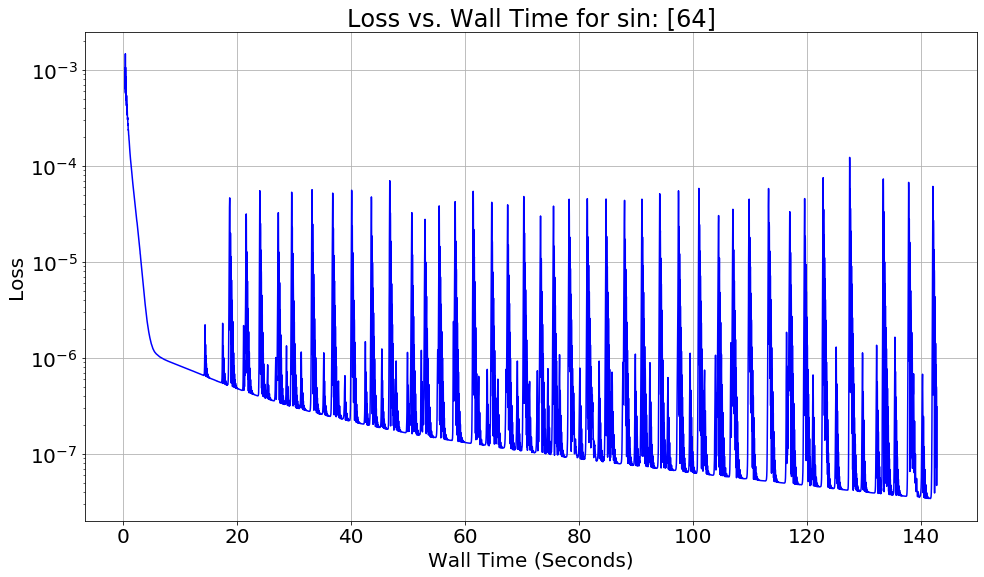

In [91]:
fig, ax = plot_loss_hist(hist_sin_64, 'sin: [64]')

In [77]:
# fig, ax = plot_pred_sin(model_sin_64, theta)

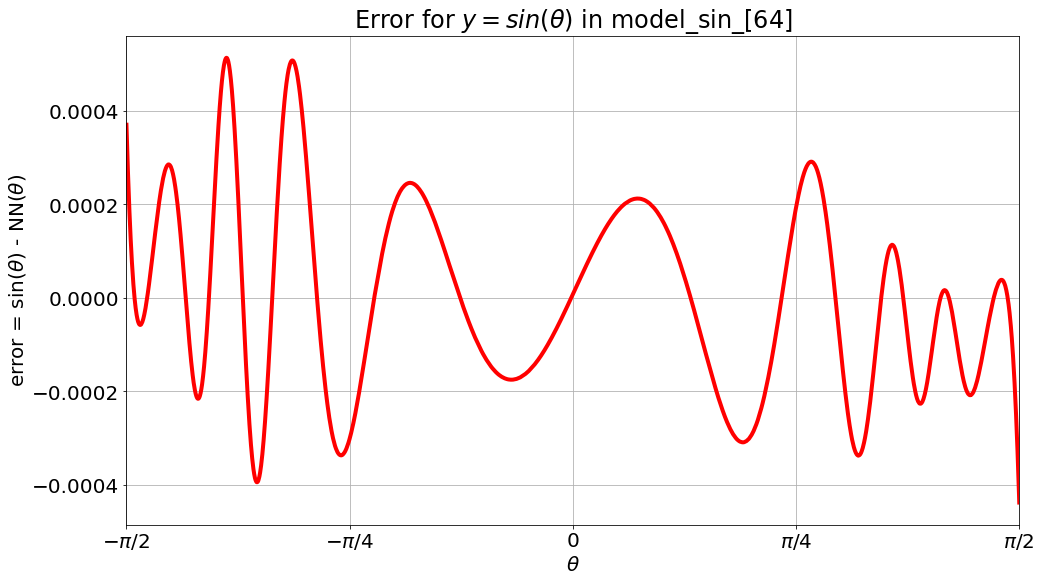

In [78]:
fig, ax = plot_error_sin(model_sin_64, theta)

### Network Design 2: [16, 16]
(model_sin_16_16 has two layers with 16 hidden units each)

In [120]:
model_sin_16_16 = make_model_odd(func_name='sin', 
                                 input_name='theta',
                                 output_name='y', 
                                 hidden_sizes=[16, 16])

In [121]:
model_sin_16_16.summary()

Model: "model_sin_[16, 16]"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
theta (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
x3 (Lambda)                     (None, 1)            0           theta[0][0]                      
__________________________________________________________________________________________________
x5 (Lambda)                     (None, 1)            0           theta[0][0]                      
__________________________________________________________________________________________________
x7 (Lambda)                     (None, 1)            0           theta[0][0]                      
_________________________________________________________________________________

**Load the network and its loss history if available; otherwise train it**

In [123]:
loss=keras.losses.MeanSquaredError()
optimizer=keras.optimizers.Adam(learning_rate=1.0E-3)

try:
    model_sin_16_16.load_weights('../models/polar_model_sin_[16, 16].h5')
    model_sin_16_16.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    hist_sin_16_16 = vartbl['hist_sin_16_16']
    print('Loaded model_sin_16_16.')
except:
    hist = compile_and_fit(model=model_sin_16_16, 
                           ds=ds_p2c, 
                           epochs=10000,
                           loss=loss, 
                           optimizer=optimizer,
                           metrics=metrics,
                           save_freq=save_freq)
    hist_sin_16_16 = hist.history
    vartbl['hist_sin_16_16'] = hist_sin_16_16
    save_vartbl(vartbl, fname)

Loaded model_sin_16_16.


In [124]:
model_sin_16_16.evaluate(ds_p2c)

1/1 [==============================] - 0s 99ms/step - loss: 1.4789e-07 - mean_absolute_error: 3.2034e-04


[1.4789002023007924e-07, 0.00032034243]

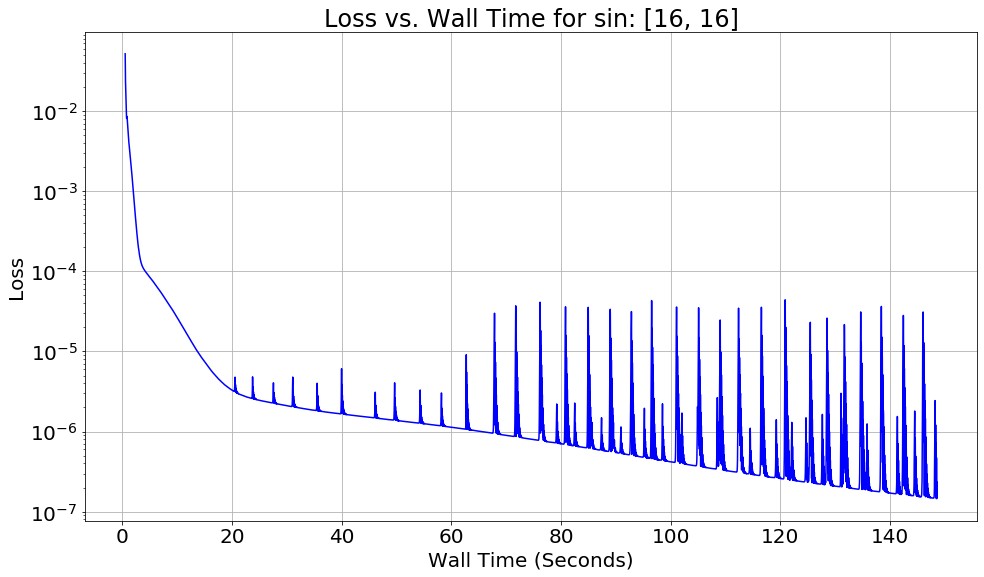

In [125]:
fig, ax = plot_loss_hist(hist_sin_16_16, 'sin: [16, 16]')

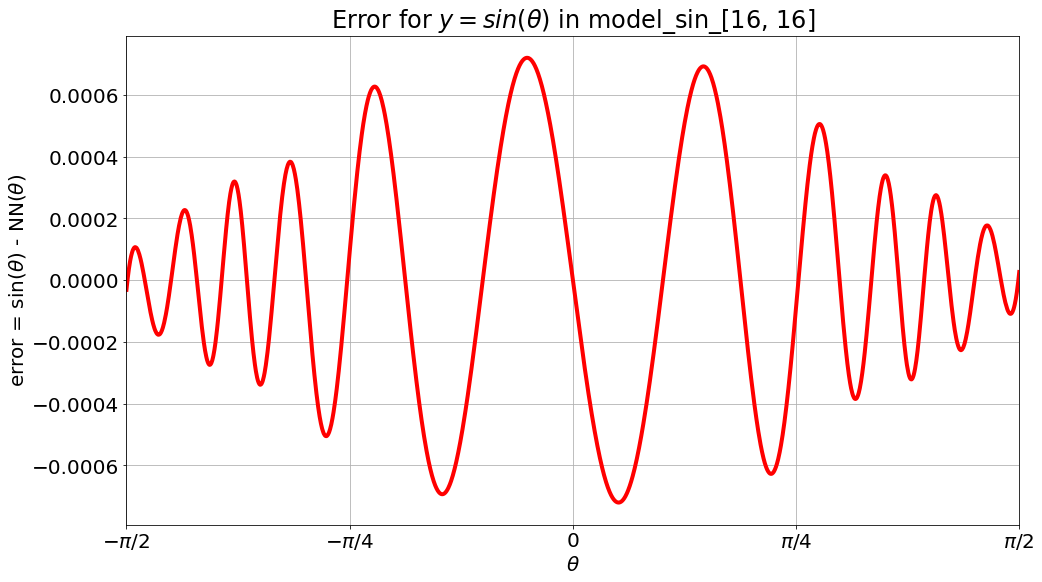

In [126]:
fig, ax = plot_error_sin(model_sin_16_16, theta)

## Neural networks for $\theta = \arcsin(y)$

## Functions for visualizing neural network outputs $\theta = \arcsin(y)$

In [99]:
def plot_pred_arcsin(model, y):
    # Predictions of the model
    theta_pred = model.predict(y)
    theta_pred = theta_pred.reshape((-1,))
    
    # Plot predictions
    fig, ax = plt.subplots(figsize=[16,9])
    ax.set_title(f'$\\theta = \\arcsin(y)$ for {model.name}')
    ax.set_xlabel('$y$')
    ax.set_ylabel('$\\theta$')
    ax.set_xlim(-1.05, 1.05)
    ax.set_xticks(np.linspace(-1.0, 1.0, 9))
    ax.set_ylim(-np.pi/2.0, np.pi/2.0)
    ax.set_yticks(np.linspace(-np.pi/2.0, np.pi/2.0, 5))
    ax.set_yticklabels(['$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$'])
    ax.plot(y, theta, color='blue', label='$\\arcsin(y)$', linewidth=4.0)
    ax.plot(y, theta_pred, color='red', label='NN$(y)$', linewidth=2.0)
    ax.grid()
    ax.legend()
    return fig, ax

In [100]:
def plot_error_arcsin(model, y):
    # Predictions of the model
    theta_pred = model.predict(y)
    theta_pred = theta_pred.reshape((-1,))
    error = theta - theta_pred
    
    # Plot predictions
    fig, ax = plt.subplots(figsize=[16,9])
    ax.set_title(f'Error in $\\theta = \\arcsin(y)$ for {model.name}')
    ax.set_xlabel('$y$')
    ax.set_ylabel('$\\theta$')
    ax.set_xlim(-1.05, 1.05)
    ax.set_xticks(np.linspace(-1.0, 1.0, 9))
    ax.plot(y, error, color='red', label='error', linewidth=4.0)
    ax.grid()
    ax.legend()
    return fig, ax

### Network Design 1: [16, 16]

In [117]:
model_arcsin_16_16 = make_model_odd(func_name='arcsin', 
                                    input_name = 'y',
                                    output_name='theta', 
                                    hidden_sizes=[16, 16])

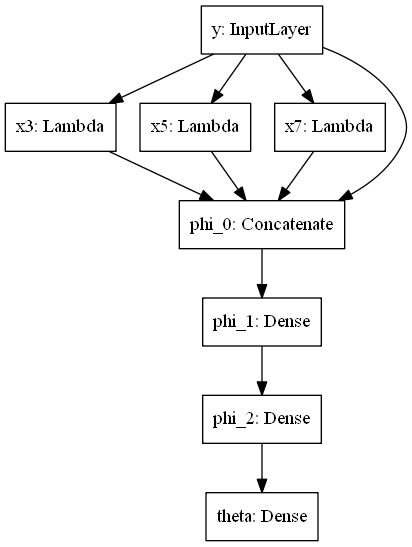

In [118]:
keras.utils.plot_model(model_arcsin_16_16)

In [119]:
model_arcsin_16_16.summary()

Model: "model_arcsin_[16, 16]"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
y (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
x3 (Lambda)                     (None, 1)            0           y[0][0]                          
__________________________________________________________________________________________________
x5 (Lambda)                     (None, 1)            0           y[0][0]                          
__________________________________________________________________________________________________
x7 (Lambda)                     (None, 1)            0           y[0][0]                          
______________________________________________________________________________

In [128]:
loss=keras.losses.MeanSquaredError()
optimizer=keras.optimizers.Adam(learning_rate=1.0E-3)

try:
    model_arcsin_16_16.load_weights('../models/polar_model_arcsin_[16, 16].h5')
    model_arcsin_16_16.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    hist_sin_16_16 = vartbl['hist_arcsin_16_16']
    print('Loaded model_arcsin_16_16.')
except:
    hist = compile_and_fit(model=model_arcsin_16_16, 
                           ds=ds_c2p, 
                           epochs=10000,
                           loss=loss, 
                           optimizer=optimizer,
                           metrics=metrics,
                           save_freq=save_freq)
    hist_arcsin_16_16 = hist.history
    vartbl['hist_arcsin_16_16'] = hist_arcsin_16_16
    save_vartbl(vartbl, fname)

Epoch 0001; loss 1.78e+00; elapsed 0:00:00
Epoch 0500; loss 1.66e-03; elapsed 0:00:09
Epoch 1000; loss 6.84e-04; elapsed 0:00:17
Epoch 1500; loss 5.16e-04; elapsed 0:00:26
Epoch 2000; loss 4.40e-04; elapsed 0:00:35
Epoch 2500; loss 3.77e-04; elapsed 0:00:43
Epoch 3000; loss 3.19e-04; elapsed 0:00:51
Epoch 3500; loss 2.64e-04; elapsed 0:01:00
Epoch 4000; loss 2.16e-04; elapsed 0:01:08
Epoch 4500; loss 1.77e-04; elapsed 0:01:17
Epoch 5000; loss 1.50e-04; elapsed 0:01:26
Epoch 5500; loss 1.32e-04; elapsed 0:01:35
Epoch 6000; loss 1.18e-04; elapsed 0:01:44
Epoch 6500; loss 1.06e-04; elapsed 0:01:52
Epoch 7000; loss 9.51e-05; elapsed 0:02:01
Epoch 7500; loss 8.43e-05; elapsed 0:02:09
Epoch 8000; loss 7.45e-05; elapsed 0:02:17
Epoch 8500; loss 6.61e-05; elapsed 0:02:26
Epoch 9000; loss 5.95e-05; elapsed 0:02:34
Epoch 9500; loss 5.41e-05; elapsed 0:02:42
Epoch 10000; loss 4.95e-05; elapsed 0:02:49


In [129]:
model_arcsin_16_16.evaluate(ds_c2p)

1/1 [==============================] - 0s 103ms/step - loss: 4.9504e-05 - mean_absolute_error: 0.0037


[4.950350194121711e-05, 0.0037371162]

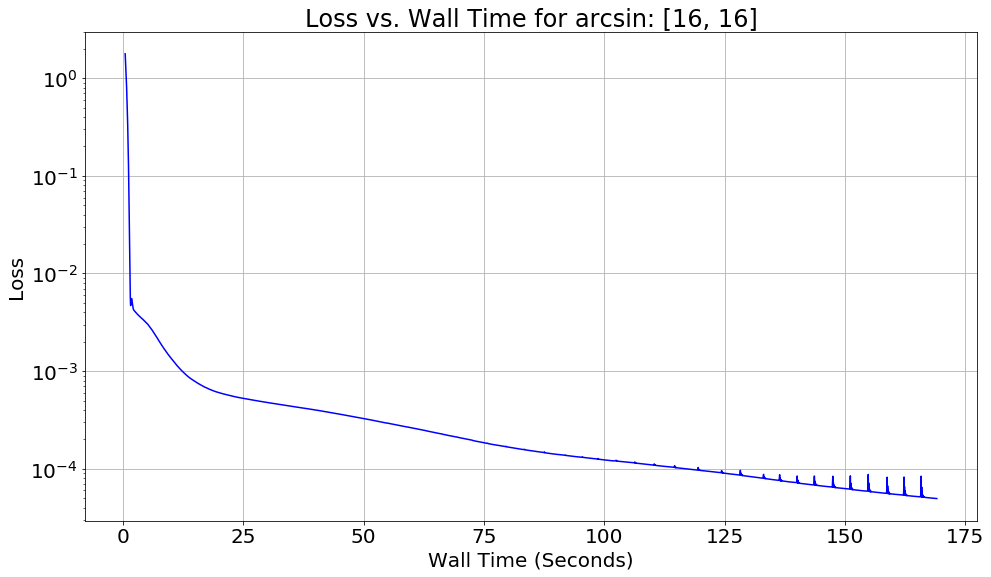

In [130]:
fig, ax = plot_loss_hist(hist_arcsin_16_16, 'arcsin: [16, 16]')

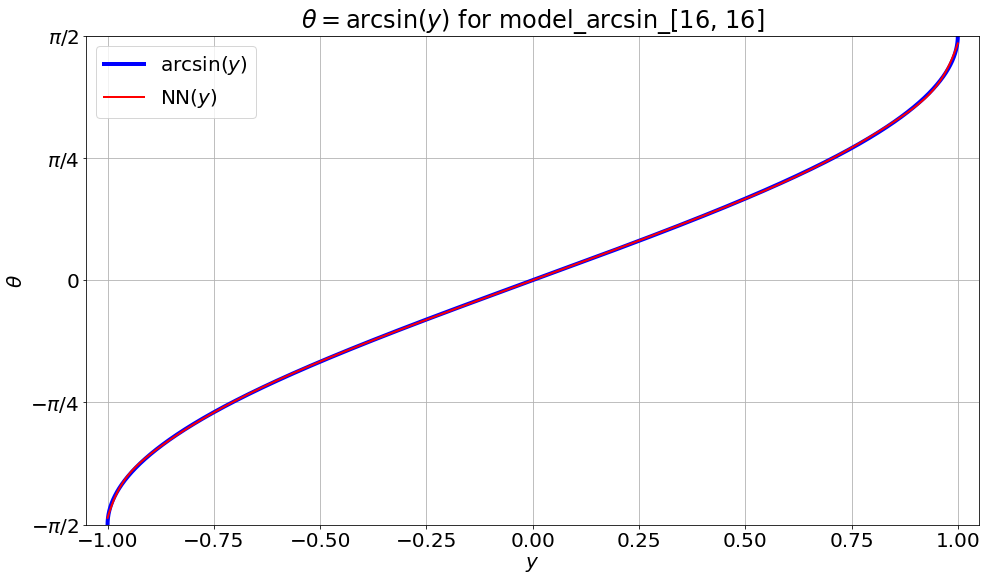

In [131]:
fig, ax = plot_pred_arcsin(model_arcsin_16_16, y)

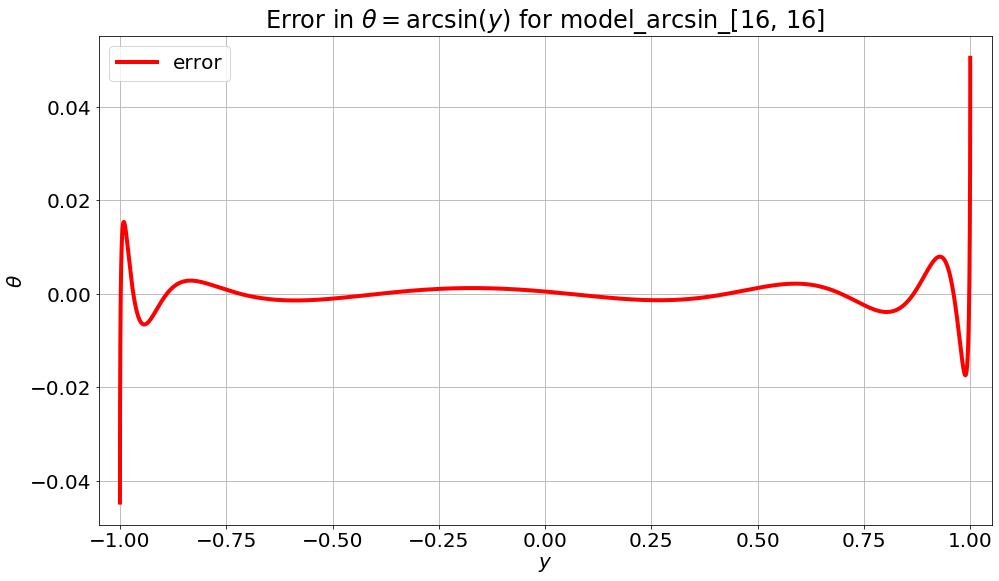

In [132]:
fig, ax = plot_error_arcsin(model_arcsin_16_16, y)

In [136]:
def make_model_c2c():
    # "autoencoder" from c to c
    model_p2c = model_sin_16_16
    model_c2p = model_arcsin_16_16
    y = keras.Input(shape=(1,), name='y')
    theta = model_c2p(y)
    y_rec = model_p2c(theta)
    model_c2c = keras.Model(input=y, output=y_rec)
    return model_c2c

In [137]:
model_c2c = make_model_c2c()

ValueError: 'model_arcsin_[16, 16]' is not a valid scope name

In [138]:
model_arcsin_16_16